In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import lec7_graphs as afx
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('vertebrate.csv')
df.head()

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [3]:
df['class'] = df['class'].replace(['fishes','birds','amphibians','reptiles'], 'non-mamals')

In [4]:
store_y_labels = df['class'].unique()

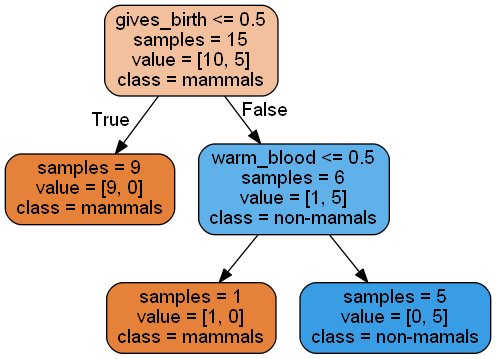

In [5]:
df['class'] = np.where(df['class'] == 'mammals', 1,0)
X_mat = df.drop(columns=['name','class'])
dec_tree = afx.demo_classfication_tree(X_mat,df['class'], store_y_labels)
Image(dec_tree.create_png())

In [6]:
question_1_pos = df.query('gives_birth == 1')
question_1_neg = df.query('gives_birth == 0')

In [7]:
print(question_1_neg['class'].value_counts())

0    9
Name: class, dtype: int64


In [8]:
question_2_pos = question_1_pos.query('warm_blood == 1')
question_2_neg = question_1_pos.query('warm_blood == 0')

In [9]:
print(question_2_pos['class'].value_counts())
print(question_2_neg['class'].value_counts())

1    5
Name: class, dtype: int64
0    1
Name: class, dtype: int64


In [10]:
df = pd.read_csv('cadata.csv', header = 1).drop(columns='1')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedianHouseValue    20640 non-null float64
MedianIncome        20640 non-null float64
MedianHouseAge      20640 non-null float64
TotalRooms          20640 non-null float64
TotalBedrooms       20640 non-null float64
Population          20640 non-null float64
Households          20640 non-null float64
Latitude            20640 non-null float64
Longitude           20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


C:\Users\s4056291\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


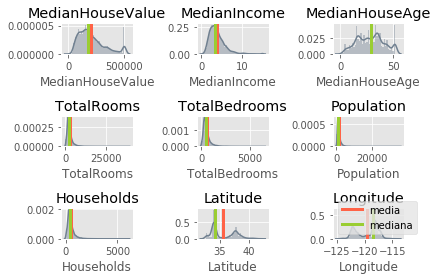

In [12]:
rows , cols = df.shape
cols = np.sqrt(cols)
for index, (colname, serie) in enumerate(df.iteritems()):
    plt.subplot(cols,cols, index +1)
    sns.distplot(serie,color='slategrey')
    plt.axvline(np.mean(serie),color='tomato', label="media", lw=3)
    plt.axvline(np.median(serie),color='yellowgreen',label='mediana',lw=3)
    plt.title(colname)
plt.tight_layout()
plt.legend()

Text(0.5, 1.0, 'Observaciones Registradas')

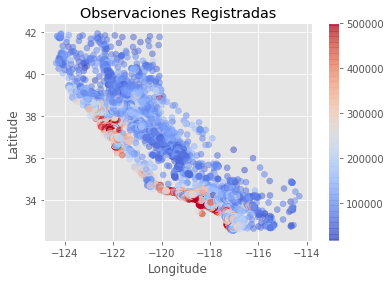

In [13]:
plt.scatter(df['Longitude'],df['Latitude'], c=df['MedianHouseValue'], cmap='coolwarm', alpha=.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Observaciones Registradas')

In [14]:
from sklearn.model_selection import train_test_split

df['log_MedianHouseValue'] = np.log(df['MedianHouseValue'])
df['log_MedianIncome'] = np.log(df['MedianIncome'])

In [15]:
y = df['log_MedianHouseValue']
X = df.drop(columns=['MedianHouseValue','MedianIncome'])
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=.33 , random_state=11238)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score

In [17]:
dec_tree = DecisionTreeRegressor().fit(X_train,y_train)

In [18]:
y_hat = dec_tree.predict(X_test)

In [19]:
print("Test MSE: ", mean_squared_error(y_test,y_hat))

Test MSE:  7.859928632065962e-06


In [20]:
print("Test MAE: ", median_absolute_error(y_test,y_hat))

Test MAE:  8.025360218688604e-05


In [21]:
print("Test R2: ", r2_score(y_test,y_hat))

Test R2:  0.9999761280359901


In [22]:
X_tr, X_te , y_tr , y_te = train_test_split(df.loc[:,['Longitude','Latitude']], df['log_MedianHouseValue'], test_size=.33, random_state = 11238)

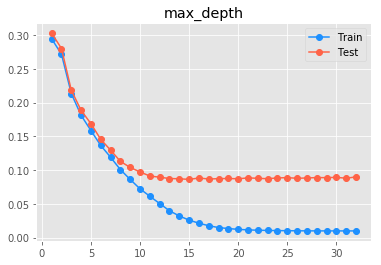

In [23]:
afx.train_test_over_params(DecisionTreeRegressor(),{'max_depth':np.linspace(1,32,32)},
                          X_tr,X_te,y_tr,y_te)

In [46]:
#a medida que la prf maxima el error cuadratico, tiende a acercarse a 0 por lo tanto se ve como overfit, cuando es 10 la maxima profundidad, tiende a estancarse por lo tanto es buen hiperparametro

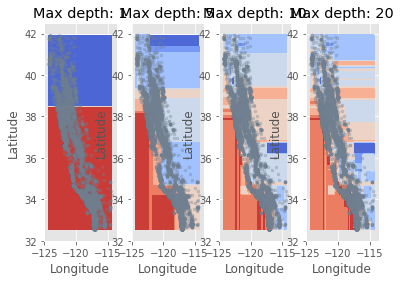

In [24]:
for index , value in enumerate([1,5,10,20]):
    plt.subplot(1,4, index+1)
    tmp_model = DecisionTreeRegressor(max_depth=value)
    afx.plot_decision_function(tmp_model,df,'Longitude','Latitude','log_MedianHouseValue',colorbar=False)
    plt.title('Max depth: {}'.format(value))

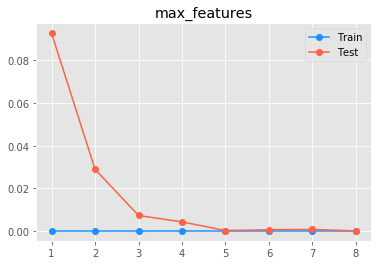

In [25]:
afx.train_test_over_params(DecisionTreeRegressor(),
                          {'max_features': list(range(1,X_train.shape[1]))},
                          X_train,X_test,y_train,y_test)

In [26]:
dec_tree.feature_importances_

array([3.06415885e-07, 2.00130433e-08, 2.24390024e-08, 1.71042730e-06,
       7.33504630e-08, 8.38884853e-08, 1.54833742e-08, 9.99997509e-01,
       2.58583562e-07])

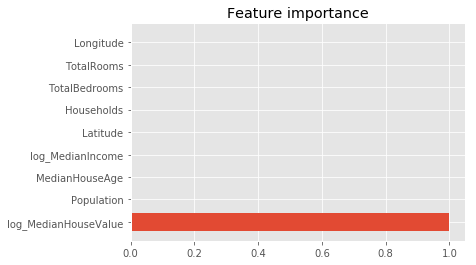

In [27]:
afx.plot_importance(dec_tree, X.columns)

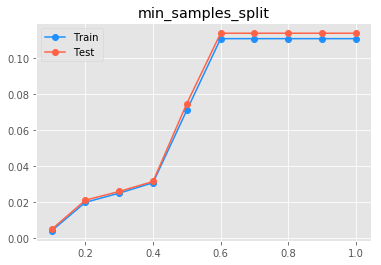

In [28]:
afx.train_test_over_params(DecisionTreeRegressor(),
                          {'min_samples_split':np.linspace(0.1,1.0,10,endpoint=True)},
                          X_train,X_test,y_train,y_test)

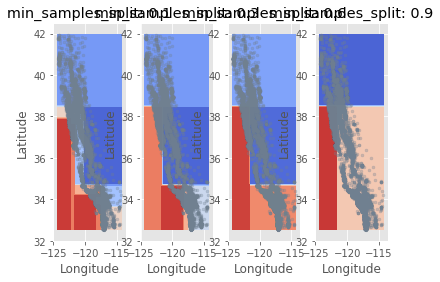

In [29]:
for index , value in enumerate([0.1,0.3,0.6,0.9]):
    plt.subplot(1,4, index+1)
    tmp_model = DecisionTreeRegressor(min_samples_split=value)
    afx.plot_decision_function(tmp_model,df,'Longitude','Latitude','log_MedianHouseValue',colorbar=False)
    plt.title('min_samples_split: {}'.format(value))

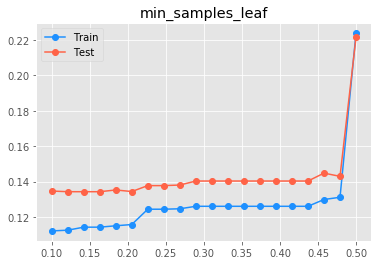

In [47]:
afx.train_test_over_params(DecisionTreeRegressor(),
                          {'min_samples_leaf':np.linspace(0.1,.5,20,endpoint=True)},
                          X_train,X_test,y_train,y_test)

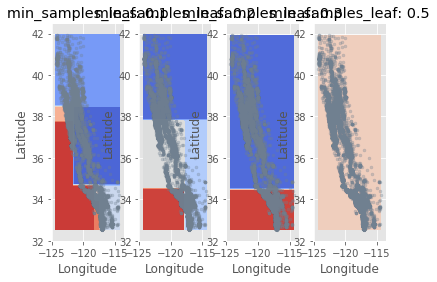

In [31]:
for index , value in enumerate([0.1,0.2,0.3,0.5]):
    plt.subplot(1,4, index+1)
    tmp_model = DecisionTreeRegressor(min_samples_leaf=value)
    afx.plot_decision_function(tmp_model,df,'Longitude','Latitude','log_MedianHouseValue',colorbar=False)
    plt.title('min_samples_leaf: {}'.format(value))

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
df = pd.read_csv('voting.csv').drop(columns='Unnamed: 0')

C:\Users\s4056291\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


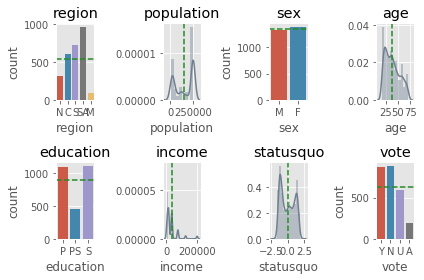

In [34]:
rows = 2
cols = df.shape[1] // rows

for index, (colname,serie) in enumerate(df.iteritems()):
    plt.subplot(rows,cols,index+1)
    if serie.dtype == 'object':
        sns.countplot(serie.dropna())
        plt.axhline(serie.value_counts().mean(), color='forestgreen', linestyle='--')
        plt.title(colname)
    else:
        sns.distplot(serie.dropna(), color='slategrey')
        plt.axvline(serie.mean(),color='Forestgreen',linestyle='--')
        plt.title(colname)
plt.tight_layout()

In [35]:
df = pd.concat([df, pd.get_dummies(df['region'], drop_first=True, prefix='region')], axis=1)
df = pd.concat([df, pd.get_dummies(df['education'], drop_first=True, prefix='ed')], axis=1)
df = pd.concat([df, pd.get_dummies(df['sex'], drop_first=True, prefix='sex')], axis=1)
df = pd.concat([df, pd.get_dummies(df['vote'], drop_first=True, prefix='vote')], axis=1)
df = df.drop(columns=['region','education','sex','vote'])
df.head()

,population,age,income,statusquo,region_M,region_N,region_S,region_SA,ed_PS,ed_S,sex_M,vote_N,vote_U,vote_Y
0,175000,65.0,35000.0,1.00820,0,1,0,0,0,0,1,0,0,1
1,175000,29.0,7500.0,-1.29617,0,1,0,0,1,0,1,1,0,0
2,175000,38.0,15000.0,1.23072,0,1,0,0,0,0,0,0,0,1
3,175000,49.0,35000.0,-1.03163,0,1,0,0,0,0,0,1,0,0
4,175000,23.0,35000.0,-1.10496,0,1,0,0,0,1,0,1,0,0


In [36]:
df = df.dropna()

In [37]:
X_train , X_test, y_train , y_test = train_test_split(df.loc[:,'population':'sex_M'], df['vote_N'], test_size=.33, random_state=11238)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
dec_tree_grid_cv = GridSearchCV(DecisionTreeClassifier(),
                               {'min_samples_split': np.linspace(0.1,1.0,10),
                               'criterion':['gini','entropy'],
                               'max_depth': np.linspace(1,32,32),
                               'min_samples_leaf': np.linspace(0.1,0.5,10),
                               'max_features': list(range(1,X_train.shape[1]))},
                               cv=5).fit(X_train,y_train)

In [40]:
dec_tree_grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 22.0,
 'max_features': 8,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2}

In [41]:
dec_tree_grid_cv.best_score_

0.8334293948126801

In [42]:
dec_tree_grid_cv.best_estimator_.feature_importances_

array([6.50997901e-05, 0.00000000e+00, 1.52372082e-02, 9.84697692e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

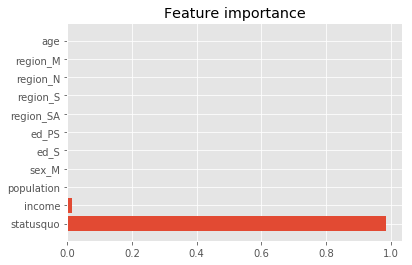

In [43]:
colnames = df.loc[:,'population':'sex_M'].columns
afx.plot_importance(dec_tree_grid_cv.best_estimator_,colnames)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,dec_tree_grid_cv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       572
           1       0.66      0.86      0.75       283

   micro avg       0.81      0.81      0.81       855
   macro avg       0.79      0.82      0.79       855
weighted avg       0.83      0.81      0.81       855

